In [1]:
# Install the Graphviz library, which is needed to render the CFG images.
!apt-get -qq install graphviz
!pip install -q graphviz

In [2]:
import re
import graphviz
from textwrap import dedent
import sys
import csv
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Increase recursion limit for potentially deep CFGs in larger programs
sys.setrecursionlimit(2000)


# 1. PROGRAM CORPUS SELECTION (LARGE PROGRAMS)


program1_code = dedent("""
    // Program 1: Simple Student Database
    #include <stdio.h>
    #include <string.h>
    struct Student {
        int id;
        char name[50];
        float gpa;
    };
    int main() {
        struct Student database[10];
        int student_count = 0;
        int choice = 0;
        int i = 0;
        int running = 1;
        database[0].id = 101;
        strcpy(database[0].name, "Alice");
        database[0].gpa = 3.8;
        student_count = 1;
        database[1].id = 102;
        strcpy(database[1].name, "Bob");
        database[1].gpa = 3.2;
        student_count = 2;
        database[2].id = 103;
        strcpy(database[2].name, "Charlie");
        database[2].gpa = 3.9;
        student_count = 3;
        printf("--- Student Database System ---\\n");
        while (running == 1) {
            printf("\\nMenu:\\n");
            printf("1. Add Student\\n");
            printf("2. Display All Students\\n");
            printf("3. Find Student with Highest GPA\\n");
            printf("4. Exit\\n");
            printf("Enter your choice: ");
            if (student_count < 5) {
                choice = 1;
            } else if (student_count == 5) {
                choice = 3;
            } else {
                choice = 4;
            }
            printf("%d\\n", choice);
            if (choice == 1) {
                printf("--- Add New Student ---\\n");
                if (student_count < 10) {
                    struct Student new_student;
                    new_student.id = 104 + student_count;
                    new_student.gpa = 2.5 + (student_count * 0.2);
                    if (student_count == 3) {
                        strcpy(new_student.name, "David");
                    } else {
                        strcpy(new_student.name, "Eve");
                    }
                    database[student_count] = new_student;
                    student_count = student_count + 1;
                    printf("Student added successfully.\\n");
                } else {
                    printf("Database is full. Cannot add more students.\\n");
                }
            } else if (choice == 2) {
                printf("--- Displaying All Students ---\\n");
                if (student_count == 0) {
                    printf("No students in the database.\\n");
                } else {
                    i = 0;
                    while (i < student_count) {
                        printf("ID: %d, Name: %s, GPA: %.2f\\n", database[i].id, database[i].name, database[i].gpa);
                        i = i + 1;
                    }
                }
            } else if (choice == 3) {
                printf("--- Student with Highest GPA ---\\n");
                if (student_count == 0) {
                    printf("No students to compare.\\n");
                } else {
                    int best_student_index = 0;
                    float max_gpa = 0.0;
                    max_gpa = database[0].gpa;
                    i = 1;
                    for (i = 1; i < student_count; i = i + 1) {
                        if (database[i].gpa > max_gpa) {
                            max_gpa = database[i].gpa;
                            best_student_index = i;
                        }
                    }
                    printf("Student with highest GPA:\\n");
                    printf("ID: %d, Name: %s, GPA: %.2f\\n", database[best_student_index].id, database[best_student_index].name, database[best_student_index].gpa);
                }
            } else if (choice == 4) {
                printf("Exiting program.\\n");
                running = 0;
            } else {
                printf("Invalid choice. Please try again.\\n");
            }
        }
        printf("--- Program Finished ---\\n");
        return 0;
    }
""")

program2_code = dedent("""
    // Program 2: Text-Based Mini-Adventure Game
    #include <stdio.h>
    int main() {
        int player_health = 100;
        int player_gold = 10;
        int player_location = 0;
        int has_sword = 0;
        int has_key = 0;
        int game_over = 0;
        printf("Welcome to the C Dungeon Adventure!\\n");
        printf("You are in the entrance hall. There are doors to the North and East.\\n");
        while (game_over == 0) {
            printf("----------------------------------------\\n");
            printf("Health: %d, Gold: %d\\n", player_health, player_gold);
            if (player_location == 0) {
                printf("You are in the Entrance Hall. Doors are to the North and East.\\n");
                int choice = 1;
                printf("You choose to go North.\\n");
                if (choice == 1) {
                    player_location = 1;
                } else {
                    player_location = 2;
                }
            } else if (player_location == 1) {
                printf("You are in the Armory. You see a rusty sword.\\n");
                if (has_sword == 0) {
                    printf("You pick up the sword.\\n");
                    has_sword = 1;
                } else {
                    printf("There is nothing else of interest here.\\n");
                }
                printf("There is a door back to the South.\\n");
                player_location = 0;
            } else if (player_location == 2) {
                printf("You are in the Treasury. You see a locked chest and a door to the West.\\n");
                if (has_key == 1) {
                    printf("You use the key to open the chest!\\n");
                    player_gold = player_gold + 100;
                    printf("You found 100 gold!\\n");
                    printf("You decide to leave the dungeon with your riches.\\n");
                    player_location = 4;
                } else {
                    printf("The chest is locked. You need a key.\\n");
                    player_location = 3;
                }
            } else if (player_location == 3) {
                printf("You entered a dark room. It was a trap!\\n");
                player_health = player_health - 50;
                printf("You lost 50 health. You stumble out and find a key on the floor.\\n");
                has_key = 1;
                if (player_health <= 0) {
                    printf("Your health is too low. You have perished.\\n");
                    game_over = 1;
                } else {
                    printf("You find your way back to the Treasury, weakened but with a key.\\n");
                    player_location = 2;
                }
            } else if (player_location == 4) {
                printf("You have found the exit!\\n");
                game_over = 1;
            }
            if (player_health <= 0) {
                printf("You have succumbed to your injuries.\\n");
                game_over = 1;
            }
            if (player_gold > 100) {
                game_over = 1;
            }
        }
        printf("--- GAME OVER ---\\n");
        printf("Final Stats: Health=%d, Gold=%d\\n", player_health, player_gold);
        if (player_gold > 100) {
            printf("You escaped a rich adventurer!\\n");
        } else {
            printf("Your adventure has come to an end.\\n");
        }
        return 0;
    }
""")


program3_code = dedent("""
    // Program 3: Sorting Algorithm Execution
    #include <stdio.h>
    #define ARRAY_SIZE 15
    int main() {
        int original_array[ARRAY_SIZE];
        int bubble_array[ARRAY_SIZE];
        int insertion_array[ARRAY_SIZE];
        int i = 0;
        int j = 0;
        int temp = 0;
        int key = 0;
        int choice = 1;
        printf("--- Sorting Algorithm Analyzer ---\\n");
        i = 0;
        while (i < ARRAY_SIZE) {
            original_array[i] = ARRAY_SIZE - i;
            i = i + 1;
        }
        printf("Original Unsorted Array:\\n");
        for (i = 0; i < ARRAY_SIZE; i = i + 1) {
            printf("%d ", original_array[i]);
            bubble_array[i] = original_array[i];
            insertion_array[i] = original_array[i];
        }
        printf("\\n\\n");
        if (choice == 1) {
            printf("Executing Bubble Sort...\\n");
            for (i = 0; i < ARRAY_SIZE - 1; i = i + 1) {
                for (j = 0; j < ARRAY_SIZE - i - 1; j = j + 1) {
                    if (bubble_array[j] > bubble_array[j + 1]) {
                        temp = bubble_array[j];
                        bubble_array[j] = bubble_array[j + 1];
                        bubble_array[j + 1] = temp;
                    }
                }
            }
            printf("Array after Bubble Sort:\\n");
            for (i = 0; i < ARRAY_SIZE; i = i + 1) {
                printf("%d ", bubble_array[i]);
            }
            printf("\\n");
        } else {
            printf("Executing Insertion Sort...\\n");
            for (i = 1; i < ARRAY_SIZE; i = i + 1) {
                key = insertion_array[i];
                j = i - 1;
                while (j >= 0 && insertion_array[j] > key) {
                    insertion_array[j + 1] = insertion_array[j];
                    j = j - 1;
                }
                insertion_array[j + 1] = key;
            }
            printf("Array after Insertion Sort:\\n");
            for (i = 0; i < ARRAY_SIZE; i = i + 1) {
                printf("%d ", insertion_array[i]);
            }
            printf("\\n");
        }
        int sorted_sum = 0;
        i = 0;
        while (i < ARRAY_SIZE) {
            if (choice == 1) {
                sorted_sum = sorted_sum + bubble_array[i];
            } else {
                sorted_sum = sorted_sum + insertion_array[i];
            }
            i = i + 1;
        }
        if (sorted_sum > 100) {
            printf("\\nThe sum of sorted elements is greater than 100.\\n");
        } else {
            printf("\\nThe sum of sorted elements is not greater than 100.\\n");
        }
        printf("--- Program Finished ---\\n");
        return 0;
    }
""")

with open("program1.c", "w") as f: f.write(program1_code)
with open("program2.c", "w") as f: f.write(program2_code)
with open("program3.c", "w") as f: f.write(program3_code)

programs = {
    "Program 1: Student Database": "program1.c",
    "Program 2: Mini-Adventure Game": "program2.c",
    "Program 3: Sorting Algorithms": "program3.c"
}

justification = {
    "Program 1: Student Database": "Chosen for its menu-driven structure using a `while` loop and a long `if-else if-else` chain, which creates multiple distinct execution paths. It involves definitions of simple variables, arrays, and struct members.",
    "Program 2: Mini-Adventure Game": "Selected due to its state-based logic within a main `while` loop. The nested `if-else` statements represent player choices and create a complex CFG with many branches and reassignments to player-state variables.",
    "Program 3: Sorting Algorithms": "This program is ideal for analyzing complex, nested loops (`for` and `while`). It contains many reassignments inside these loops (swapping elements), making the reaching definitions analysis for loop-carried variables particularly interesting."
}

CS202 - Reaching Definitions Analyzer

## 1. Program Corpus Selection

🔹 **Program 1: Student Database**
   **Justification:** Chosen for its menu-driven structure using a `while` loop and a long `if-else if-else` chain, which creates multiple distinct execution paths. It involves definitions of simple variables, arrays, and struct members.

🔹 **Program 2: Mini-Adventure Game**
   **Justification:** Selected due to its state-based logic within a main `while` loop. The nested `if-else` statements represent player choices and create a complex CFG with many branches and reassignments to player-state variables.

🔹 **Program 3: Sorting Algorithms**
   **Justification:** This program is ideal for analyzing complex, nested loops (`for` and `while`). It contains many reassignments inside these loops (swapping elements), making the reaching definitions analysis for loop-carried variables particularly interesting.

------------------------------------------------------------


==================

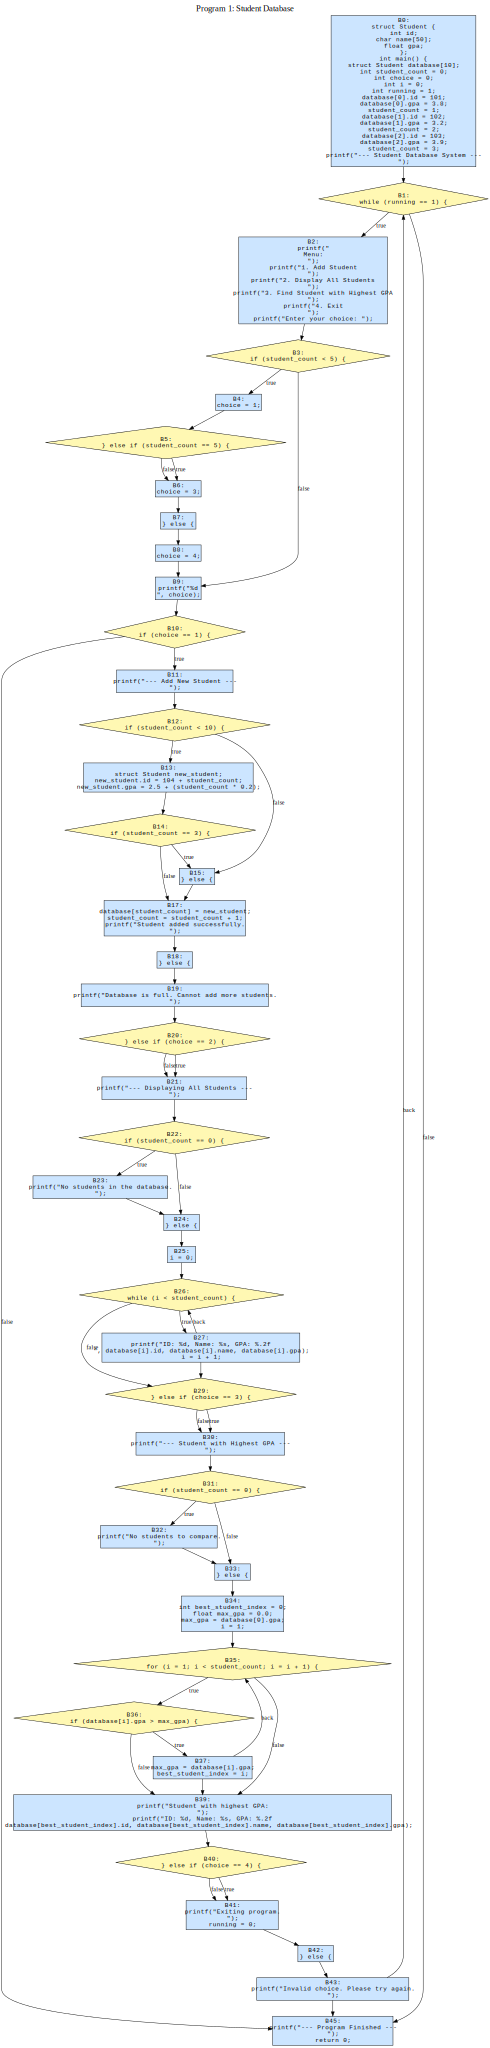


## 3. Cyclomatic Complexity Metrics

  - Number of Nodes (N): 42
  - Number of Edges (E): 58
  - Cyclomatic Complexity (CC = E - N + 2): 18

## 4. Reaching Definitions Analysis


--- Reaching Definitions Analysis (Iterations) ---

--- Iteration 1 ---
Block      | gen[B]                         | kill[B]                        | in[B]                                    | out[B]                                  
-----------------------------------------------------------------------------------------------------------------------------------------------------------
B0         | d11, d12, d13, d2, d3, d4      | d1, d10, d14, d15, d16, d20, d21, d22, d26, d27, d30, d5, d6, d7, d8, d9 |                                          | d11, d12, d13, d2, d3, d4               
B1         |                                |                                | d11, d12, d13, d2, d3, d4                | d11, d12, d13, d2, d3, d4               
B2         |                                |                

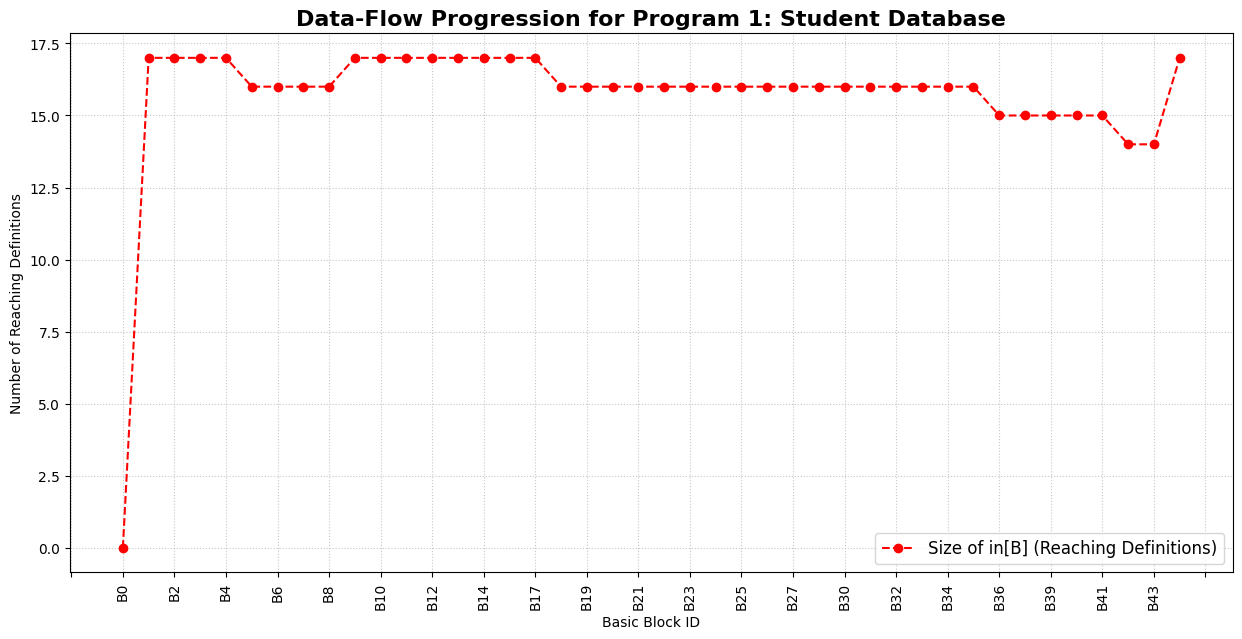

------------------------------------------------------------


==================== ANALYZING: Program 2: Mini-Adventure Game ====================


## 2. CFG Construction & Visualization

Basic Blocks Identified (first 5 shown):
  B0: int main() { int player_health = 100; int player_gold = 10; int player...
  B1: while (game_over == 0) {...
  B2: printf("----------------------------------------\n"); printf("Health: ...
  B3: if (player_location == 0) {...
  B4: printf("You are in the Entrance Hall. Doors are to the North and East....
  ...

Displaying and Saving Control Flow Graph...
CFG diagram saved to 'program2_cfg.png'


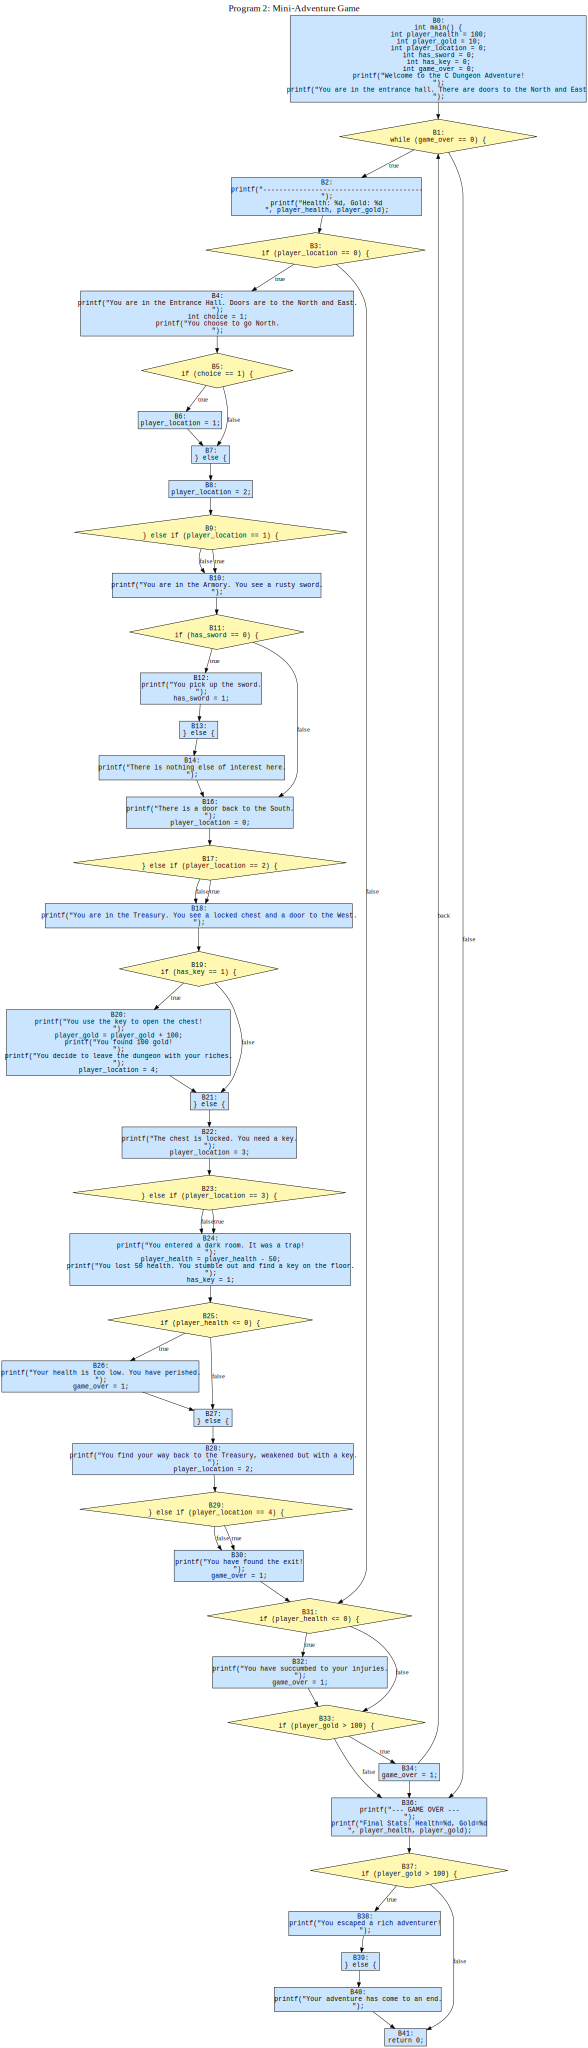


## 3. Cyclomatic Complexity Metrics

  - Number of Nodes (N): 40
  - Number of Edges (E): 53
  - Cyclomatic Complexity (CC = E - N + 2): 15

## 4. Reaching Definitions Analysis


--- Reaching Definitions Analysis (Iterations) ---

--- Iteration 1 ---
Block      | gen[B]                         | kill[B]                        | in[B]                                    | out[B]                                  
-----------------------------------------------------------------------------------------------------------------------------------------------------------
B0         | d1, d2, d3, d4, d5, d6         | d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20, d21, d8, d9 |                                          | d1, d2, d3, d4, d5, d6                  
B1         |                                |                                | d1, d2, d21, d3, d4, d5, d6              | d1, d2, d21, d3, d4, d5, d6             
B2         |                                |                      

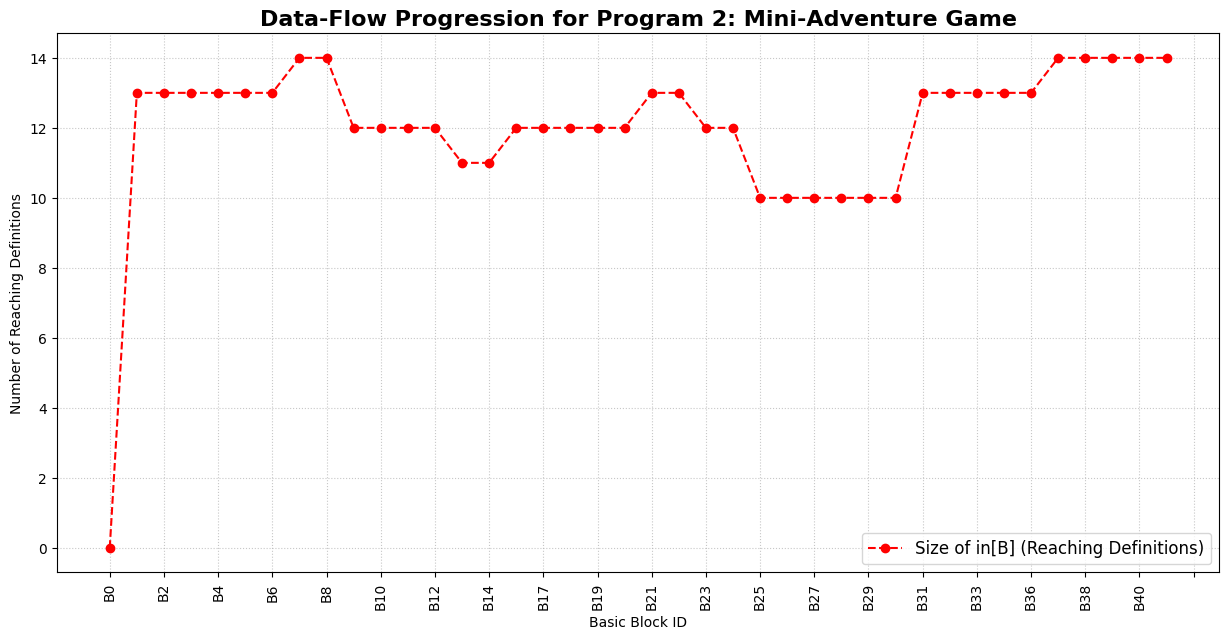

------------------------------------------------------------


==================== ANALYZING: Program 3: Sorting Algorithms ====================


## 2. CFG Construction & Visualization

Basic Blocks Identified (first 5 shown):
  B0: int main() { int original_array[ARRAY_SIZE]; int bubble_array[ARRAY_SI...
  B1: while (i < ARRAY_SIZE) {...
  B2: original_array[i] = ARRAY_SIZE - i; i = i + 1;...
  B3: printf("Original Unsorted Array:\n");...
  B4: for (i = 0; i < ARRAY_SIZE; i = i + 1) {...
  ...

Displaying and Saving Control Flow Graph...
CFG diagram saved to 'program3_cfg.png'


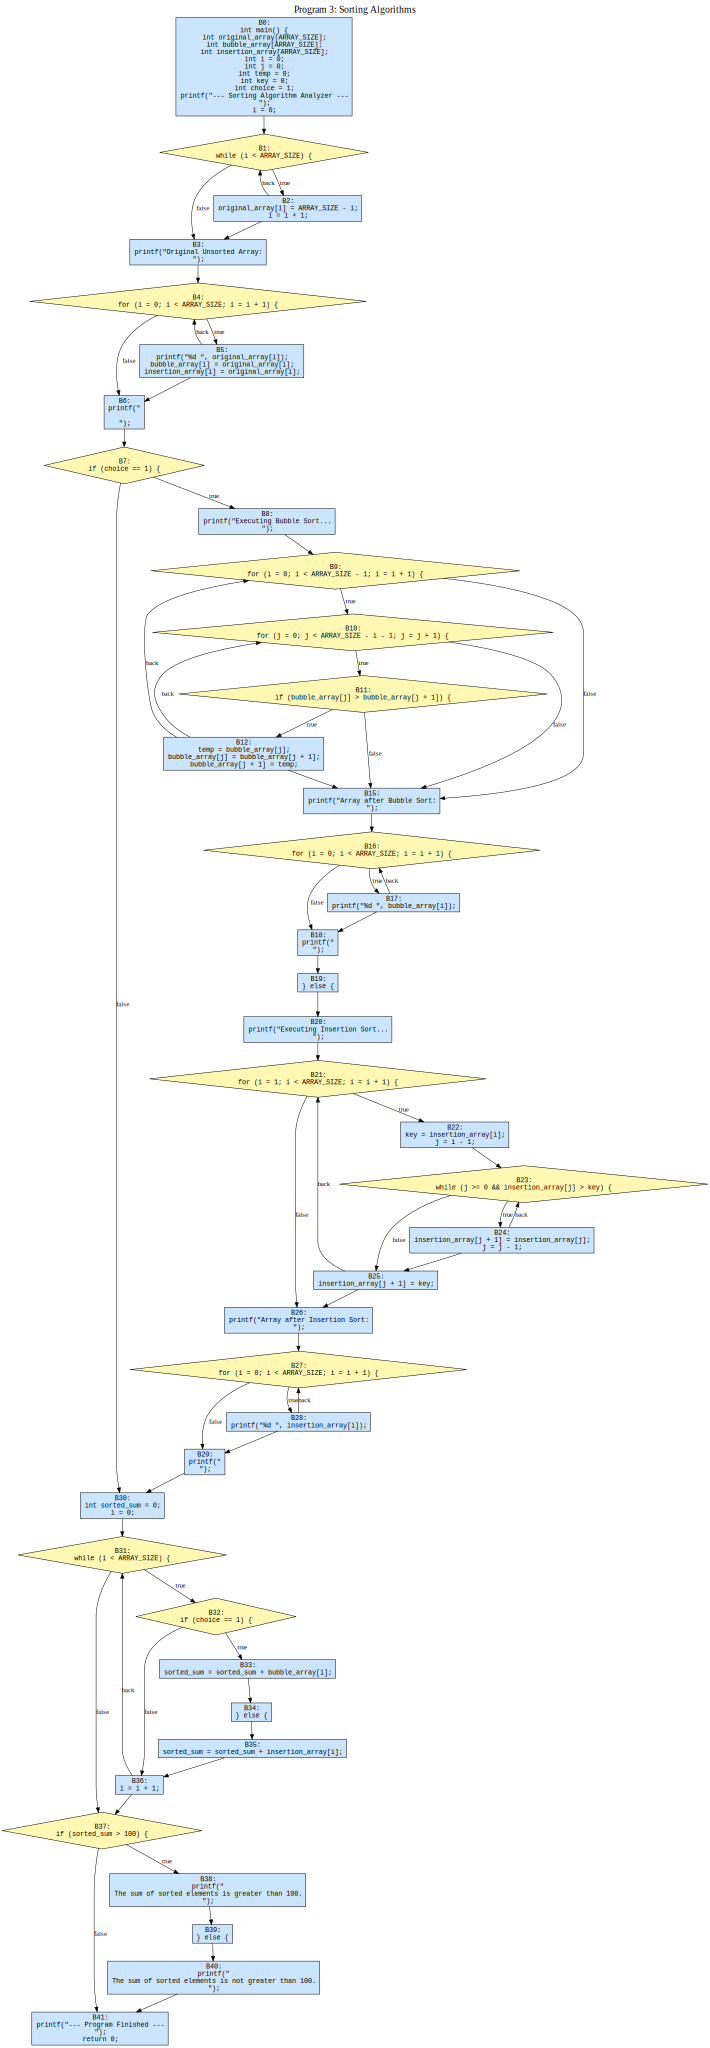


## 3. Cyclomatic Complexity Metrics

  - Number of Nodes (N): 40
  - Number of Edges (E): 61
  - Cyclomatic Complexity (CC = E - N + 2): 23

## 4. Reaching Definitions Analysis


--- Reaching Definitions Analysis (Iterations) ---

--- Iteration 1 ---
Block      | gen[B]                         | kill[B]                        | in[B]                                    | out[B]                                  
-----------------------------------------------------------------------------------------------------------------------------------------------------------
B0         | d2, d26, d3, d4, d5            | d1, d12, d13, d14, d17, d18, d19, d20, d22, d24, d29, d6, d8, d9 |                                          | d2, d26, d3, d4, d5                     
B1         |                                |                                | d2, d26, d29, d3, d4, d5, d7             | d2, d26, d29, d3, d4, d5, d7            
B2         | d29, d7                        | d1, d12, d17, d18, d24,

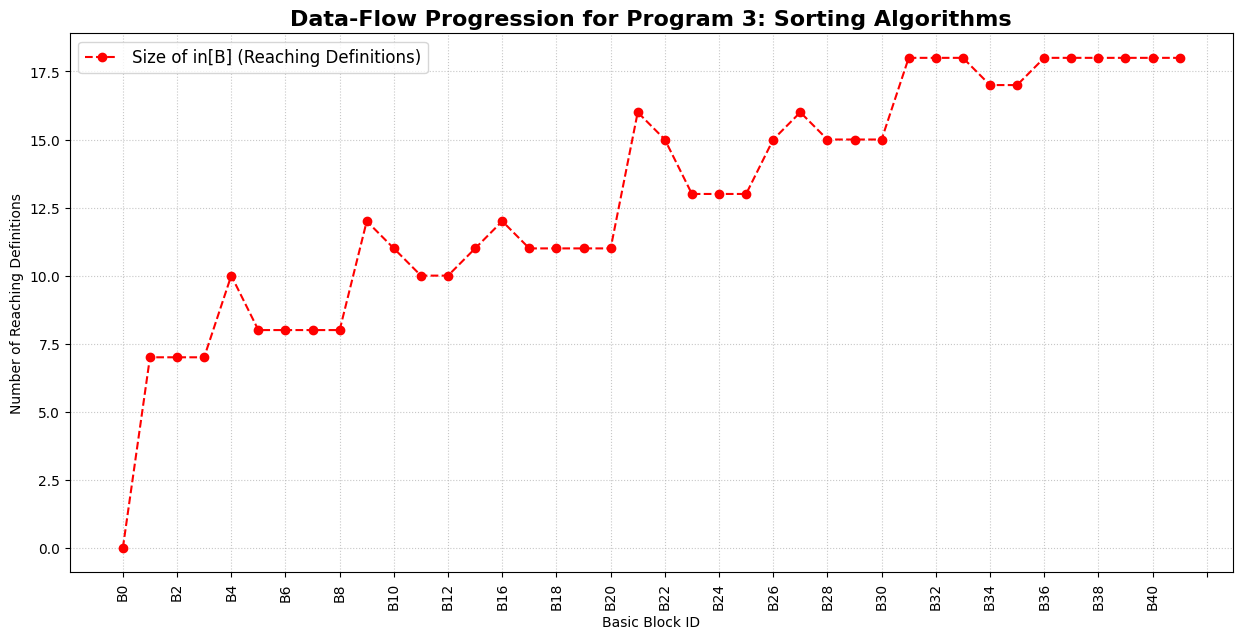

------------------------------------------------------------


Final Summary: Complexity Metrics
Program                        | No. of Nodes (N)     | No. of Edges (E)     | Cyclomatic Complexity (CC)
----------------------------------------------------------------------------------------------------
Program 1: Student Database    | 42                   | 58                   | 18                       
Program 2: Mini-Adventure Game | 40                   | 53                   | 15                       
Program 3: Sorting Algorithms  | 40                   | 61                   | 23                       


Generating Complexity Metrics Plot
Metrics plot saved to 'complexity_metrics_plot.png'


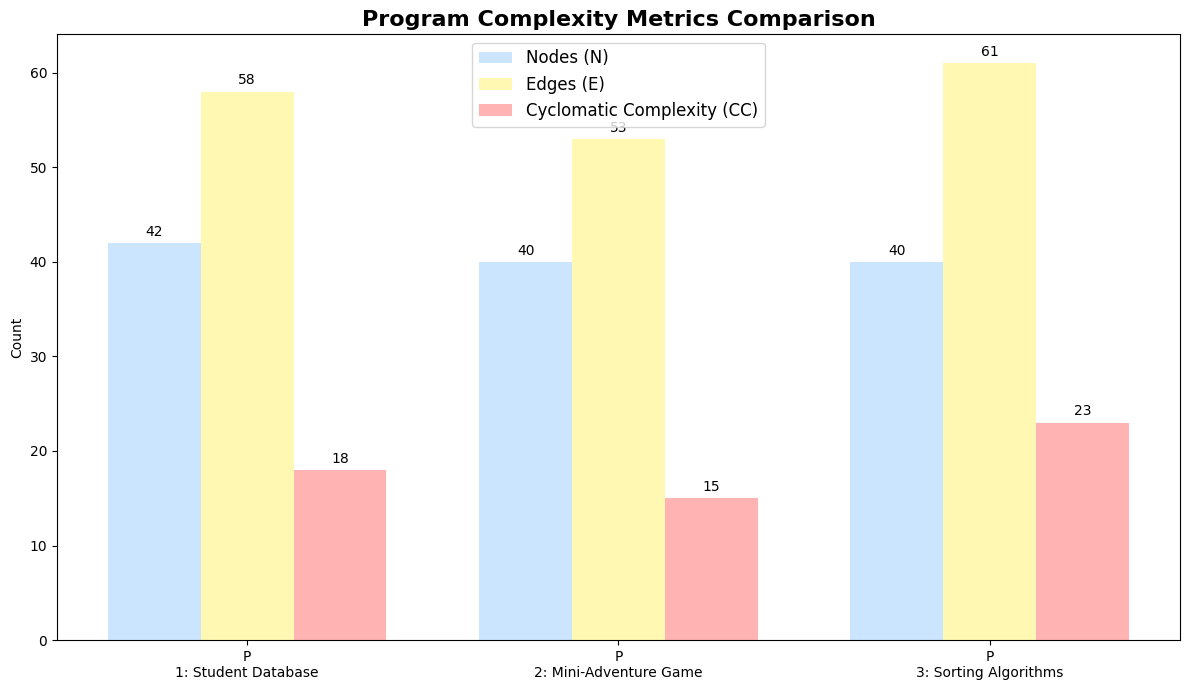



Generating Blocks vs. Definitions Plot
Blocks vs. Defs plot saved to 'blocks_vs_defs_plot.png'


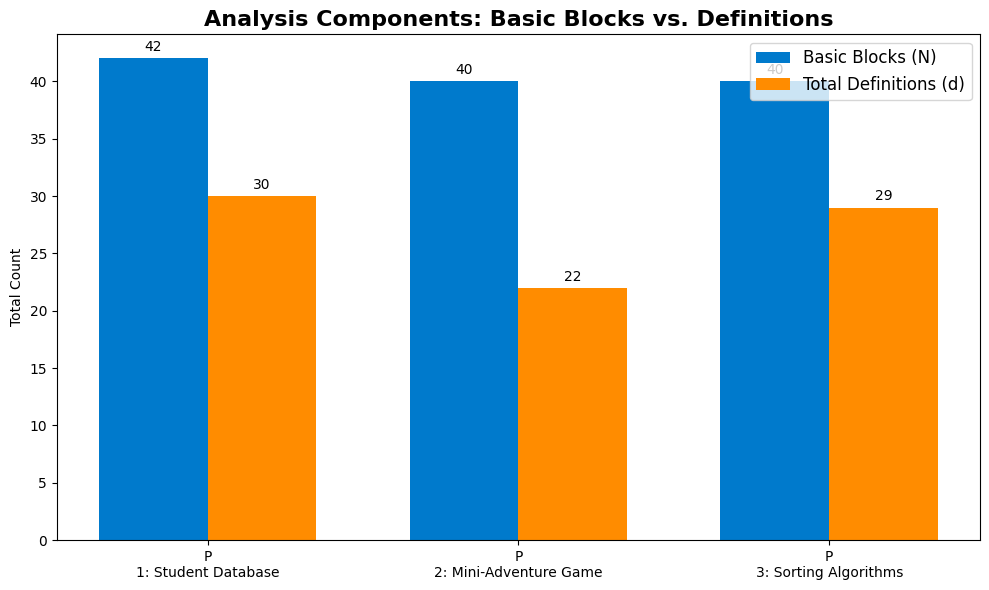



Zipping all outputs into 'analysis_outputs.zip'
 Added 'program1_cfg.png' to the zip archive.
 Added 'program1_reaching_defs.csv' to the zip archive.
 Added 'program1_dataflow_plot.png' to the zip archive.
 Added 'program2_cfg.png' to the zip archive.
 Added 'program2_reaching_defs.csv' to the zip archive.
 Added 'program2_dataflow_plot.png' to the zip archive.
 Added 'program3_cfg.png' to the zip archive.
 Added 'program3_reaching_defs.csv' to the zip archive.
 Added 'program3_dataflow_plot.png' to the zip archive.
 Added 'complexity_metrics_plot.png' to the zip archive.
 Added 'blocks_vs_defs_plot.png' to the zip archive.

 Successfully created 'analysis_outputs.zip'.
You can download it from the file browser on the left panel in Colab.


In [3]:
# CORE ANALYZER CLASS (WITH SAVE/EXPORT FUNCTIONALITY)


class C_Analyzer:
    def __init__(self, c_code):
        # Store original code with line numbers for brace matching
        self.raw_lines = [line.strip() for line in c_code.split('\n')]

        # Filtered lines for analysis
        self.lines = []
        self.line_map = {} # Maps filtered line index to original line index
        original_line_num = 0
        for line in self.raw_lines:
            if line and not line.startswith('//') and not line.startswith('#') and 'strcpy' not in line:
                self.line_map[len(self.lines)] = original_line_num
                self.lines.append(line)
            original_line_num += 1

        self.leaders = set()
        self.basic_blocks = {}
        self.cfg = {}
        self.edges = []
        self.definitions = {}
        self.gen = {}
        self.kill = {}
        self.in_sets = {}
        self.out_sets = {}

    def _find_leaders(self):
        if not self.lines: return
        self.leaders.add(0) # Rule 1
        for i, line in enumerate(self.lines):
            # Rule 2 (target of branch) & 3 (instruction after branch)
            if any(keyword in line for keyword in ['if', 'while', 'for', 'else']):
                self.leaders.add(i) # The conditional is a leader
                if i + 1 < len(self.lines): self.leaders.add(i + 1) # Instruction after is a leader
                # Find target by brace matching
                start_line = self.line_map.get(i, 0)
                brace_count = 0
                found_start_brace = False
                for j in range(start_line, len(self.raw_lines)):
                    if '{' in self.raw_lines[j]:
                        brace_count += self.raw_lines[j].count('{')
                        found_start_brace = True
                    if '}' in self.raw_lines[j]:
                        brace_count -= self.raw_lines[j].count('}')
                    if found_start_brace and brace_count == 0:
                        # The line after the closing brace is a leader
                        if j + 1 < len(self.raw_lines):
                            # Find this raw line in our filtered lines
                            for filtered_idx, raw_idx in self.line_map.items():
                                if raw_idx >= j + 1:
                                    self.leaders.add(filtered_idx)
                                    break
                        break

    def _create_basic_blocks(self):
        if not self.leaders: return
        sorted_leaders = sorted(list(self.leaders))
        for i, start_index in enumerate(sorted_leaders):
            block_id = f"B{i}"
            end_index = len(self.lines)
            if i + 1 < len(sorted_leaders): end_index = sorted_leaders[i+1]
            block_content = [line for line in self.lines[start_index:end_index] if line not in ['{', '}']]
            if block_content:
                self.basic_blocks[block_id] = {"code": block_content, "start_line": start_index, "end_line": end_index - 1}
                self.cfg[block_id] = []

    def _build_cfg(self):
        if not self.basic_blocks: return
        block_ids = sorted(self.basic_blocks.keys(), key=lambda b: self.basic_blocks[b]['start_line'])

        for i, block_id in enumerate(block_ids):
            last_line_idx = self.basic_blocks[block_id]['end_line']
            last_line_code = self.lines[last_line_idx]
            next_block_id = block_ids[i+1] if i + 1 < len(block_ids) else None

            if any(keyword in last_line_code for keyword in ['if', 'while', 'for']):
                if next_block_id: self.edges.append((block_id, next_block_id, 'true'))

                start_line_raw = self.line_map.get(last_line_idx, 0)
                brace_count = 0
                found_start_brace = False
                end_scope_line = -1
                for j in range(start_line_raw, len(self.raw_lines)):
                    if '{' in self.raw_lines[j]: found_start_brace = True; brace_count += 1
                    if '}' in self.raw_lines[j]: brace_count -= 1
                    if found_start_brace and brace_count == 0:
                        end_scope_line = j; break

                false_target = None
                for b_id_s in block_ids:
                    if self.basic_blocks[b_id_s]['start_line'] > last_line_idx:
                        if self.line_map.get(self.basic_blocks[b_id_s]['start_line'], -1) > end_scope_line:
                            false_target = b_id_s; break

                if end_scope_line + 1 < len(self.raw_lines) and 'else' in self.raw_lines[end_scope_line + 1]:
                    for b_id_s in block_ids:
                        if self.basic_blocks[b_id_s]['start_line'] > last_line_idx:
                            if 'else' in self.lines[self.basic_blocks[b_id_s]['start_line']]:
                                false_target = b_id_s; break

                if false_target: self.edges.append((block_id, false_target, 'false'))

                if 'while' in last_line_code or 'for' in last_line_code:
                    potential_ends = [b for b in block_ids if self.basic_blocks[b]['start_line'] > self.basic_blocks[block_id]['start_line'] and (not false_target or self.basic_blocks[b]['start_line'] < self.basic_blocks[false_target]['start_line'])]
                    if potential_ends:
                        end_body_block = max(potential_ends, key=lambda b: self.basic_blocks[b]['start_line'])
                        self.edges.append((end_body_block, block_id, 'back'))
            else:
                if 'return' not in last_line_code and next_block_id:
                    self.edges.append((block_id, next_block_id, ''))

        self.edges = sorted(list(set(self.edges)))

    def get_complexity_metrics(self):
        N = len(self.basic_blocks)
        E = len(self.edges)
        CC = E - N + 2
        return N, E, CC

    def visualize_cfg(self, title="CFG", filename=None):
        dot = graphviz.Digraph(comment=title)
        dot.attr(label=title, fontsize='20', labelloc='t')
        dot.attr('node', fontname='Courier')

        for block_id, block_info in self.basic_blocks.items():
            label = f"{block_id}:\n" + "\n".join(block_info['code'])
            last_line_of_block = block_info['code'][-1]
            is_conditional_block = any(keyword in last_line_of_block for keyword in ['if (', 'while (', 'for ('])

            if is_conditional_block:
                dot.node(block_id, label, shape='diamond', style='filled', fillcolor='#fff8b3')
            else:
                dot.node(block_id, label, shape='box', style='filled', fillcolor='#cce5ff')

        for start, end, label in self.edges:
            if start in self.basic_blocks and end in self.basic_blocks:
                dot.edge(start, end, label=label)

        if filename:
            try:
                dot.render(filename, format='png', cleanup=True, view=False)
                print(f"CFG diagram saved to '{filename}.png'")
            except Exception as e:
                print(f"Error saving CFG: {e}")

        return dot

    def _identify_definitions(self):
        def_count = 1
        assignment_regex = re.compile(r'\b([a-zA-Z_]\w*(?:\.\w+|\[.*?\])?)\s*=\s*[^=].*;')
        for i, line in enumerate(self.lines):
            match = assignment_regex.search(line)
            if match:
                var_name = re.sub(r'\[.*?\]', '', match.group(1))
                self.definitions[f"d{def_count}"] = {'var': var_name, 'code': line}
                def_count += 1

    def _compute_gen_kill(self):
        all_defs_by_var = {}
        for def_id, info in self.definitions.items():
            all_defs_by_var.setdefault(info['var'], set()).add(def_id)

        for block_id, block_info in self.basic_blocks.items():
            self.gen[block_id], self.kill[block_id] = set(), set()
            block_defs = {info['var']: def_id for def_id, info in self.definitions.items() if info['code'] in block_info['code']}

            self.gen[block_id] = set(block_defs.values())
            for var in block_defs:
                self.kill[block_id].update(all_defs_by_var[var] - self.gen[block_id])

    def run_reaching_definitions(self, csv_filename=None):
        self._identify_definitions()
        self._compute_gen_kill()
        block_ids = sorted(self.basic_blocks.keys(), key=lambda b: int(b[1:]))

        predecessors = {b_id: [] for b_id in block_ids}
        for start, end, _ in self.edges:
            if start in predecessors and end in predecessors:
                predecessors[end].append(start)

        for b_id in block_ids:
            self.in_sets[b_id], self.out_sets[b_id] = set(), self.gen.get(b_id, set())

        changed = True; iteration = 0
        print("\n--- Reaching Definitions Analysis (Iterations) ---")
        while changed:
            changed, iteration = False, iteration + 1
            print(f"\n--- Iteration {iteration} ---")
            print(f"{'Block':<10} | {'gen[B]':<30} | {'kill[B]':<30} | {'in[B]':<40} | {'out[B]':<40}")
            print("-" * 155)

            for b_id in block_ids:
                in_b = set().union(*(self.out_sets.get(p, set()) for p in predecessors.get(b_id, [])))
                out_b = self.gen.get(b_id, set()).union(in_b - self.kill.get(b_id, set()))

                if out_b != self.out_sets.get(b_id, set()): changed = True
                self.in_sets[b_id], self.out_sets[b_id] = in_b, out_b

                gen_str = ", ".join(sorted(list(self.gen.get(b_id, set()))))
                kill_str = ", ".join(sorted(list(self.kill.get(b_id, set()))))
                print(f"{b_id:<10} | {gen_str:<30} | {kill_str:<30} | {', '.join(sorted(list(in_b))):<40} | {', '.join(sorted(list(out_b))):<40}")

        print("\nConvergence reached.")

        if csv_filename:
            try:
                with open(csv_filename, 'w', newline='') as f:
                    writer = csv.writer(f)
                    writer.writerow(['Block', 'gen[B]', 'kill[B]', 'in[B]', 'out[B]'])
                    for b_id in block_ids:
                        writer.writerow([
                            b_id,
                            ", ".join(sorted(list(self.gen.get(b_id, set())))),
                            ", ".join(sorted(list(self.kill.get(b_id, set())))),
                            ", ".join(sorted(list(self.in_sets.get(b_id, set())))),
                            ", ".join(sorted(list(self.out_sets.get(b_id, set()))))
                        ])
                print(f"Reaching definitions table saved to '{csv_filename}'")
            except Exception as e:
                print(f"Error saving CSV: {e}")

    def interpret_results(self):
        print("\n--- Interpretation of Results ---")
        defs_by_var = {}
        for def_id, info in self.definitions.items():
            defs_by_var.setdefault(info['var'], []).append(def_id)

        for b_id in sorted(self.basic_blocks.keys(), key=lambda b: int(b[1:])):
            reaching_in = self.in_sets.get(b_id, set())
            multi_def_vars = [f"'{var}' (from {sorted(list(reaching_in.intersection(d_ids)))})" for var, d_ids in defs_by_var.items() if len(reaching_in.intersection(d_ids)) > 1]
            if multi_def_vars:
                print(f"At the entry of Block {b_id}, these variables may have multiple reaching definitions:")
                print(f"  - {', '.join(multi_def_vars)}")


# MAIN EXECUTION SCRIPT


output_files = []
metrics_data = []

print("="*60 + "\nCS202 - Reaching Definitions Analyzer\n" + "="*60)
print("\n## 1. Program Corpus Selection\n")
for name, reason in justification.items():
    print(f"🔹 **{name}**\n   **Justification:** {reason}\n")
print("-" * 60)

for name, filepath in programs.items():
    print(f"\n\n{'='*20} ANALYZING: {name} {'='*20}\n")
    with open(filepath, 'r') as f: c_code = f.read()

    analyzer = C_Analyzer(c_code)
    base_filename = filepath.replace('.c', '')

    # Define filenames for outputs
    cfg_filename = f"{base_filename}_cfg" # .png will be added by render
    csv_filename = f"{base_filename}_reaching_defs.csv"
    output_files.append(f"{cfg_filename}.png")
    output_files.append(csv_filename)

    print("\n## 2. CFG Construction & Visualization\n")
    analyzer._find_leaders()
    analyzer._create_basic_blocks()
    analyzer._build_cfg()

    print("Basic Blocks Identified (first 5 shown):")
    for i, (block_id, block_info) in enumerate(sorted(analyzer.basic_blocks.items(), key=lambda item: int(item[0][1:]))):
        if i >= 5: break
        # Cleaned up printing for easier copy/pasting
        code_str = " ".join(block_info['code'])
        print(f"  {block_id}: {code_str[:70]}...") # Truncate long lines
    if len(analyzer.basic_blocks) > 5: print("  ...")

    print("\nDisplaying and Saving Control Flow Graph...")
    cfg_graph = analyzer.visualize_cfg(name, filename=cfg_filename)
    display(cfg_graph)

    print("\n## 3. Cyclomatic Complexity Metrics\n")
    N, E, CC = analyzer.get_complexity_metrics()
    print(f"  - Number of Nodes (N): {N}\n  - Number of Edges (E): {E}\n  - Cyclomatic Complexity (CC = E - N + 2): {CC}")

    print("\n## 4. Reaching Definitions Analysis\n")
    analyzer.run_reaching_definitions(csv_filename=csv_filename)
    analyzer.interpret_results()


    # --- ADDED NEW PLOT 1: DATA-FLOW PROGRESSION (Per-Program) ---
    print("\n--- Generating Data-Flow Progression Plot ---")
    try:
        # 1. Extract Data
        import matplotlib.pyplot as plt # Import locally for robustness
        block_ids = sorted(analyzer.basic_blocks.keys(), key=lambda b: int(b[1:]))
        in_set_sizes = [len(analyzer.in_sets[b_id]) for b_id in block_ids]

        # 2. Create the Plot
        plt.figure(figsize=(15, 7))
        plt.plot(block_ids, in_set_sizes, marker='o', linestyle='--', color='r', label='Size of in[B] (Reaching Definitions)')

        # 3. Format the Plot
        plt.title(f'Data-Flow Progression for {name}', fontsize=16, fontweight='bold')
        plt.xlabel('Basic Block ID')
        plt.ylabel('Number of Reaching Definitions')
        plt.legend(fontsize='large')
        plt.grid(True, linestyle=':', alpha=0.7)

        # 4. Clean up X-axis for many blocks
        if len(block_ids) > 25:
            plt.xticks(rotation=90)
            ax = plt.gca()
            ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=25)) # Show ~25 labels

        # 5. Save the Plot
        plot_filename_prog = f"{base_filename}_dataflow_plot.png"
        plt.savefig(plot_filename_prog, bbox_inches='tight')
        print(f"Data-flow plot saved to '{plot_filename_prog}'")
        output_files.append(plot_filename_prog) # Add to zip
        plt.show() # Display the plot in the notebook
    except Exception as e:
        print(f"Error generating data-flow plot: {e}")
    # --- END OF NEW DATA-FLOW PLOT ---

    # --- MODIFIED metrics_data.append to include new data ---
    total_defs = len(analyzer.definitions)
    metrics_data.append({
        "Program": name,
        "Nodes (N)": N,
        "Edges (E)": E,
        "Cyclomatic Complexity (CC)": CC,
        "Total Definitions": total_defs
    })

    print("-" * 60)

print("\n\n" + "="*60 + "\nFinal Summary: Complexity Metrics\n" + "="*60)
print(f"{'Program':<30} | {'No. of Nodes (N)':<20} | {'No. of Edges (E)':<20} | {'Cyclomatic Complexity (CC)':<25}")
print("-" * 100)
for item in metrics_data:
    print(f"{item['Program']:<30} | {item['Nodes (N)']:<20} | {item['Edges (E)']:<20} | {item['Cyclomatic Complexity (CC)']:<25}")


# --- ADDED NEW PLOT 2: COMPLEXITY METRICS (Summary) ---
print("\n\n" + "="*60 + "\nGenerating Complexity Metrics Plot\n" + "="*60)

# 0. Add imports to make this block standalone
import matplotlib.pyplot as plt
import numpy as np

try:
    # 1. Extract Data for Plotting
    program_names = [item['Program'].replace("Program ", "P\n") for item in metrics_data] # Shorten names
    nodes_n = [item['Nodes (N)'] for item in metrics_data]
    edges_e = [item['Edges (E)'] for item in metrics_data]
    cyclomatic_cc = [item['Cyclomatic Complexity (CC)'] for item in metrics_data]

    # 2. Set up Bar Positions
    x = np.arange(len(program_names))  # the label locations
    width = 0.25  # the width of the bars
    fig, ax = plt.subplots(figsize=(12, 7))

    # 3. Create the Bars
    rects1 = ax.bar(x - width, nodes_n, width, label='Nodes (N)', color='#cce5ff')
    rects2 = ax.bar(x, edges_e, width, label='Edges (E)', color='#fff8b3')
    rects3 = ax.bar(x + width, cyclomatic_cc, width, label='Cyclomatic Complexity (CC)', color='#ffb3b3')

    # 4. Add Labels, Title, and Legend
    ax.set_ylabel('Count')
    ax.set_title('Program Complexity Metrics Comparison', fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(program_names)
    ax.legend(fontsize='large')

    # Add number labels on top of each bar
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.bar_label(rects3, padding=3)

    fig.tight_layout()

    # 5. Save the Plot
    plot_filename = "complexity_metrics_plot.png"
    plt.savefig(plot_filename)
    print(f"Metrics plot saved to '{plot_filename}'")
    output_files.append(plot_filename) # Add plot to the list for zipping
    plt.show() # Display the plot in the notebook
except Exception as e:
    print(f"Error generating complexity plot: {e}")
# --- END OF NEW PLOT 2 ---


# --- ADDED NEW PLOT 3: BLOCKS VS DEFINITIONS (Summary) ---
print("\n\n" + "="*60 + "\nGenerating Blocks vs. Definitions Plot\n" + "="*60)

try:
    # 1. Extract Data
    program_names = [item['Program'].replace("Program ", "P\n") for item in metrics_data]
    nodes_n = [item['Nodes (N)'] for item in metrics_data]
    total_defs = [item['Total Definitions'] for item in metrics_data]

    # 2. Set up Bar Positions
    x = np.arange(len(program_names))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 6))

    # 3. Create the Bars
    rects1 = ax.bar(x - width/2, nodes_n, width, label='Basic Blocks (N)', color='#007acc')
    rects2 = ax.bar(x + width/2, total_defs, width, label='Total Definitions (d)', color='#ff8c00')

    # 4. Add Labels and Title
    ax.set_ylabel('Total Count')
    ax.set_title('Analysis Components: Basic Blocks vs. Definitions', fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(program_names)
    ax.legend(fontsize='large')

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    fig.tight_layout()

    # 5. Save the Plot
    plot_filename = "blocks_vs_defs_plot.png"
    plt.savefig(plot_filename)
    print(f"Blocks vs. Defs plot saved to '{plot_filename}'")
    output_files.append(plot_filename) # Add to zip
    plt.show() # Display the plot
except Exception as e:
    print(f"Error saving plot: {e}")
# --- END OF NEW PLOT 3 ---


# --- ZIP ALL OUTPUTS FOR EASY DOWNLOAD ---
zip_filename = "analysis_outputs.zip"
print("\n\n" + "="*60 + f"\nZipping all outputs into '{zip_filename}'\n" + "="*60)
try:
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        for file in output_files:
            if os.path.exists(file):
                zipf.write(file)
                print(f" Added '{file}' to the zip archive.")
    print(f"\n Successfully created '{zip_filename}'.")
    print("You can download it from the file browser on the left panel in Colab.")
except Exception as e:
    print(f"Error creating zip file: {e}")